<a href="https://colab.research.google.com/github/annefrancine/DataScience_Estiam/blob/main/knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

l’algorithme K-NN (K-nearest neighbors) est une méthode d’apprentissage supervisé. Il peut être utilisé aussi bien pour la régression que pour la classification. Son fonctionnement peut être assimilé à l’analogie suivante “dis moi qui sont tes voisins, je te dirais qui tu es…”.

Pour effectuer une prédiction, l’algorithme K-NN ne va pas calculer un modèle prédictif à partir d’un Training Set comme c’est le cas pour la régression logistique ou la régression linéaire.

 En effet,  K-NN n’a pas besoin de construire un modèle prédictif. Ainsi, pour K-NN il n’existe pas de phase d’apprentissage proprement dite. C’est pour cela qu’on le catégorise parfois dans le Lazy Learning. Pour pouvoir effectuer une prédiction, K-NN se base sur le jeu de données pour produire un résultat.



**Comment K-NN effectue une prédiction ?**
Pour effectuer une prédiction, l’algorithme K-NN va se baser sur le jeu de données en entier. En effet, pour une observation, qui ne fait pas parti du jeu de données, qu’on souhaite prédire, l’algorithme va chercher les K instances du jeu de données les plus proches de notre observation. Ensuite pour ces K voisins, l’algorithme se basera sur leurs variables de sortie (output variable) y pour calculer la valeur de la variable y de l’observation qu’on souhaite prédire. 

Par ailleurs  :

- Si K-NN est utilisé pour la régression, c’est la moyenne (ou la médiane) des variables y des K plus proches observations qui servira pour la prédiction
- Si K-NN est utilisé pour la classification, c’est le mode des variables y des K plus proches observations qui servira pour la prédiction

**Calcul de similarité dans l’algorithme K-NN**
Comme on vient de le voir dans notre écriture algorithme, K-NN a besoin d’une fonction de calcul de distance entre deux observations. Plus deux points sont proches l’un de l’autre, plus ils sont similaires et vice versa.

Il existe plusieurs fonctions de calcul de distance, notamment, la distance euclidienne, la distance de Manhattan, la distance de Minkowski, celle de Jaccard, la distance de Hamming

**La distance euclidienne:**
 - distance qui calcule la racine carrée de la somme des différences carrées entre les coordonnées de deux points 

** Distance Manhattan :**
- la distance de Manhattan: calcule la somme des valeurs absolues des différences entre les coordonnées de deux points 

**Distance Hamming :**
- la distance entre deux points données est la différence maximale entre leurs coordonnées sur une dimension.
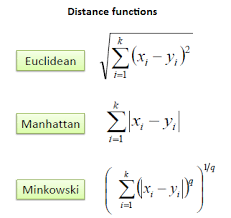







**Comment choisir la valeur K ?**

Le choix de la valeur K à utiliser pour effectuer une prédiction avec K-NN, varie en fonction du jeu de données. En règle générale, moins on utilisera de voisins (un nombre K petit) plus on sera sujette au sous apprentissage (underfitting). 

Par ailleurs, plus on utilise de voisins (un nombre K grand) plus, sera fiable dans notre prédiction. Toutefois, si on utilise K nombre de voisins avec K=N et N étant le nombre d’observations, on risque d’avoir du overfitting et par conséquent un modèle qui se généralise mal sur des observations qu’il n’a pas encore vu.

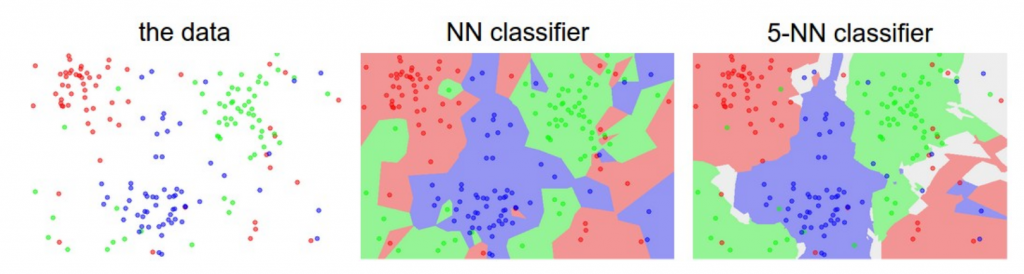

**Les données et la problématique**


D'abord, parlons du jeu de données que nous allons utiliser. C'est un dataset très célèbre, appelé MNIST. Il est constitué d'un ensemble de 70000 images 28x28 pixels en noir et blanc annotées du chiffre correspondant (entre 0 et 9). L'objectif de ce jeu de données était de permettre à un ordinateur d'apprendre à reconnaître des nombres manuscrits automatiquement (pour lire des chèques par exemple). Ce dataset utilise des données réelles qui ont déjà été pré-traitées pour être plus facilement utilisables par un algorithme.

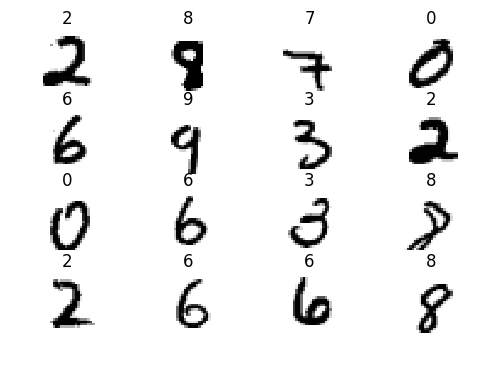



In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)


In [2]:
# L'objet  mnist contient deux entrées principales,  data  et  target. On peut les afficher :

# Le dataset principal qui contient toutes les images
print (mnist.data.shape)

# Le vecteur d'annotations associé au dataset (nombre entre 0 et 9)
print (mnist.target.shape)

(70000, 784)
(70000,)


- data contient les images sous forme de tableaux de 28 x 28 = 784 couleurs de pixel en niveau de gris, c'est-à-dire que la couleur de chaque pixel est représentée par un nombre entre 0 et 16 qui représente si celle-ci est proche du noir ou pas (0 = blanc, 16 = noir). 

- target qui contient les annotations (de 1 à 9) correspondant à la valeur "lue" du chiffre.

Le dataset est relativement petit mais, pour le modèle k-NN, il est déjà trop gros pour obtenir rapidement des résultats. On va donc effectuer un sampling et travailler sur seulement 5000 données :

In [6]:
sample = np.random.randint(70000, size=5000)
data = mnist.data[sample]
target = mnist.target[sample]

Une fois notre dataset chargé, nous allons séparer le jeu de données en training set et testing set.

In [7]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(data, target, train_size=0.8)

On peut créer un premier classifieur 3-NN, c'est-à-dire qui prend en compte les 3 plus proches voisins pour la classification. Pour cela, on va utiliser l'implémentation de l'algorithme qui existe dans la librairie scikit-learn 

In [8]:
from sklearn import neighbors

knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain, ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

l'algorithme ici n'effectue aucune optimisation mais va juste sauvegarder toutes les données en mémoire. C'est sa manière d'apprendre en quelque sorte.

Testons à présent l’erreur de notre classifieur. La méthode  score  effectue exactement ça : tester les performances de prédiction d'un classifieur dans lequel on passe un jeu de données annoté — dans notre cas le jeu de données de test. Il renvoie ainsi le pourcentage de prédiction véridique trouvée par le classifieur

In [9]:
error = 1 - knn.score(xtest, ytest)
print('Erreur: %f' % error)

Erreur: 0.060000


Pour trouver le k optimal, on va simplement tester le modèle pour tous les k de 2 à 15, mesurer l’erreur test et afficher la performance en fonction de k :

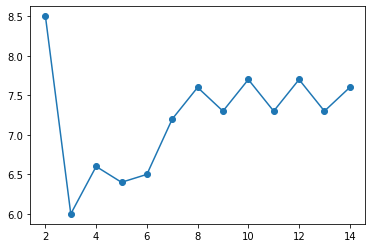

In [11]:
errors = []
for k in range(2,15):
    knn = neighbors.KNeighborsClassifier(k)
    errors.append(100*(1 - knn.fit(xtrain, ytrain).score(xtest, ytest)))
plt.plot(range(2,15), errors, 'o-')
plt.show()

Comme on peut le voir, le k-NN le plus performant est celui pour lequel k = 4. On connaît donc notre classifieur final optimal : 4-nn. Ce qui veut dire que c'est celui qui classifie le mieux les données, et qui donc dans ce cas précis reconnaît au mieux les nombres écrits à la main.

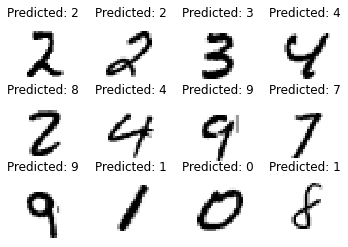

In [12]:
# On récupère le classifieur le plus performant
knn = neighbors.KNeighborsClassifier(4)
knn.fit(xtrain, ytrain)

# On récupère les prédictions sur les données test
predicted = knn.predict(xtest)

# On redimensionne les données sous forme d'images
images = xtest.reshape((-1, 28, 28))

# On selectionne un echantillon de 12 images au hasard
select = np.random.randint(images.shape[0], size=12)

# On affiche les images avec la prédiction associée
fig,ax = plt.subplots(3,4)

for index, value in enumerate(select):
    plt.subplot(3,4,index+1)
    plt.axis('off')
    plt.imshow(images[value],cmap=plt.cm.gray_r,interpolation="nearest")
    plt.title('Predicted: {}'.format( predicted[value]) )

plt.show()

Pour pouvoir un peu mieux comprendre les erreurs effectuées par le classifieur, on peut aussi afficher un extrait des prédictions erronées :

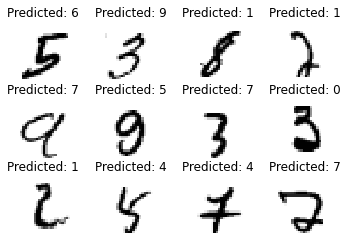

In [13]:
# on récupère les données mal prédites 
misclass = (ytest != predicted)
misclass_images = images[misclass,:,:]
misclass_predicted = predicted[misclass]

# on sélectionne un échantillon de ces images
select = np.random.randint(misclass_images.shape[0], size=12)

# on affiche les images et les prédictions (erronées) associées à ces images
for index, value in enumerate(select):
    plt.subplot(3,4,index+1)
    plt.axis('off')
    plt.imshow(misclass_images[value],cmap=plt.cm.gray_r,interpolation="nearest")
    plt.title('Predicted: {}'.format(misclass_predicted[value]) )

plt.show()